# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Steven Hot Asi Sihite
- **Email:** stesi2702@gmail.com
- **ID Dicoding:** steven_sihite

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh faktor lingkungan dan musiman (seperti suhu, kelembapan, kecepatan angin, dan musim) terhadap jumlah peminjaman sepeda setiap hari?
- Apa pola penggunaan sepeda oleh pengguna kasual dan terdaftar di hari kerja dibandingkan akhir pekan, serta peran libur nasional dalam memengaruhi jumlah peminjaman?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Data Wrangling

### Gathering Data

In [2]:
#Gathering Data
data_hour = pd.read_csv('hour.csv')
data_day = pd.read_csv('day.csv')

print("5 Data Awal Per Jam")
display(data_hour.head())

print("\n5 Data Awal Per Jam")
display(data_day.head())

5 Data Awal Per Jam


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1



5 Data Awal Per Jam


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Melakukan pengambilan dataset sesuai dengan keperluan kita
- Dua dataset yang diambil adalah dataset dalam bentuk CSV sehingga menggunakan method read_csv()

### Assessing Data

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah data duplikat di Day: 0
Jumlah data duplikat di Hour: 0


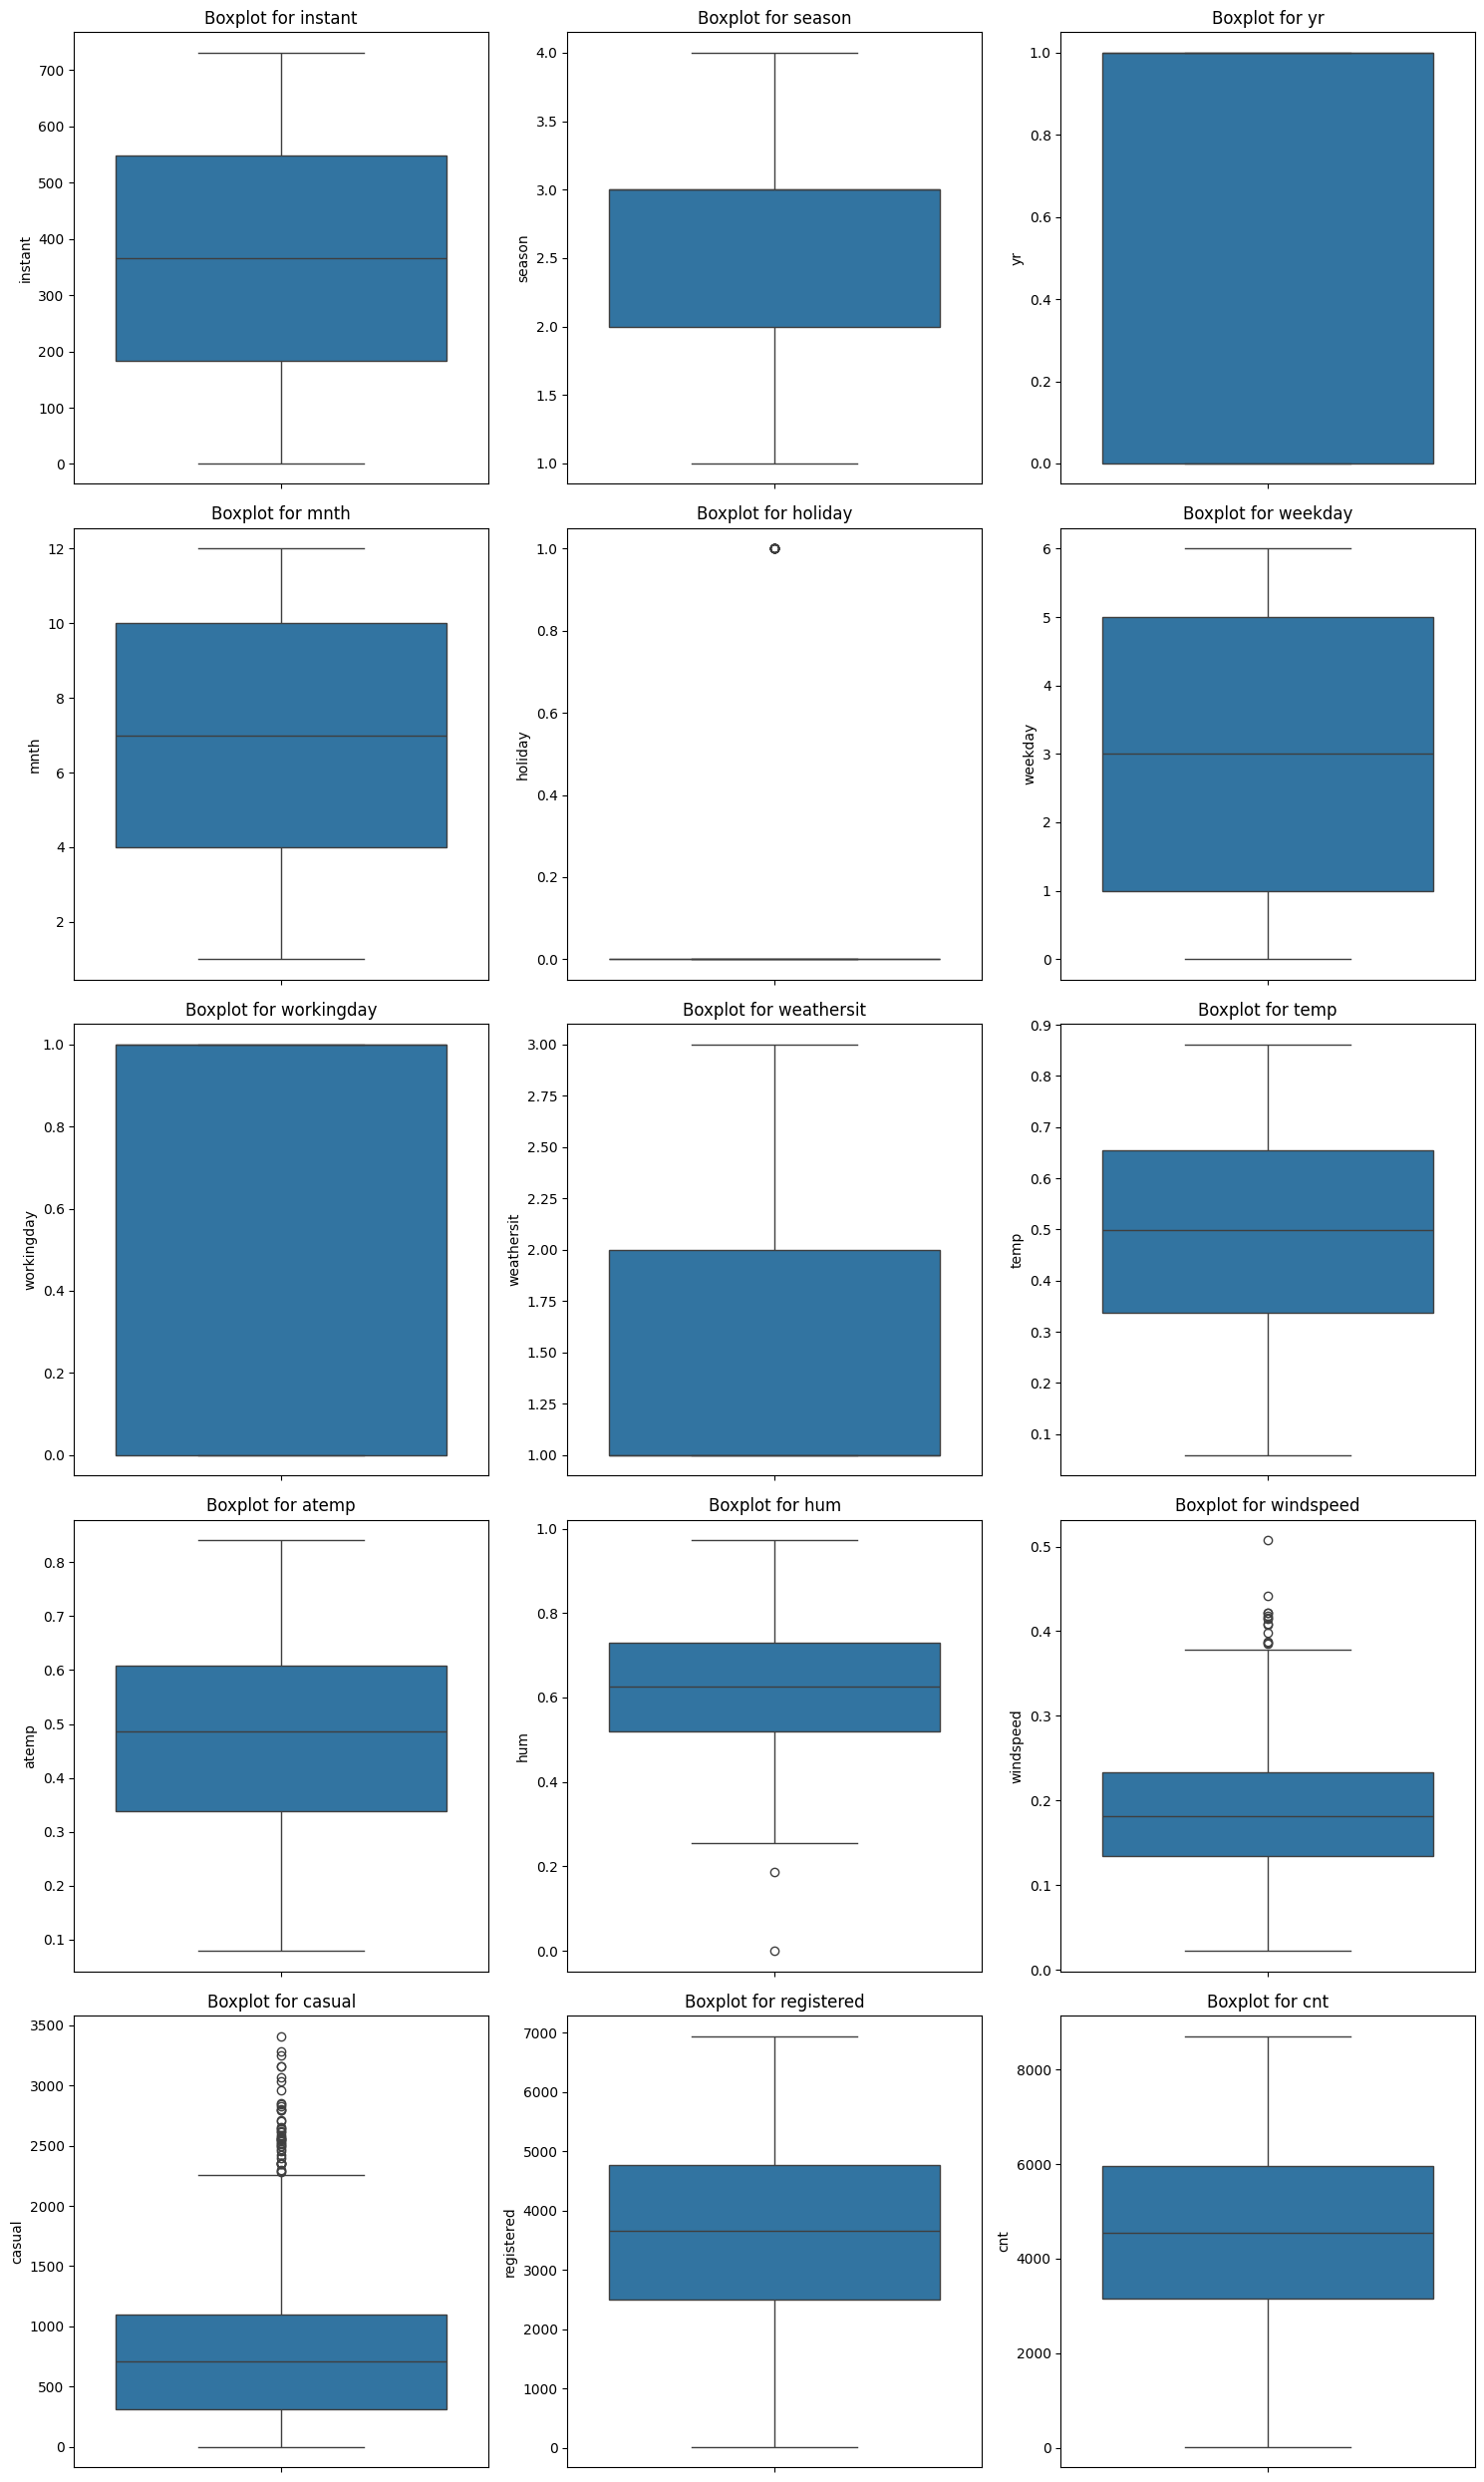

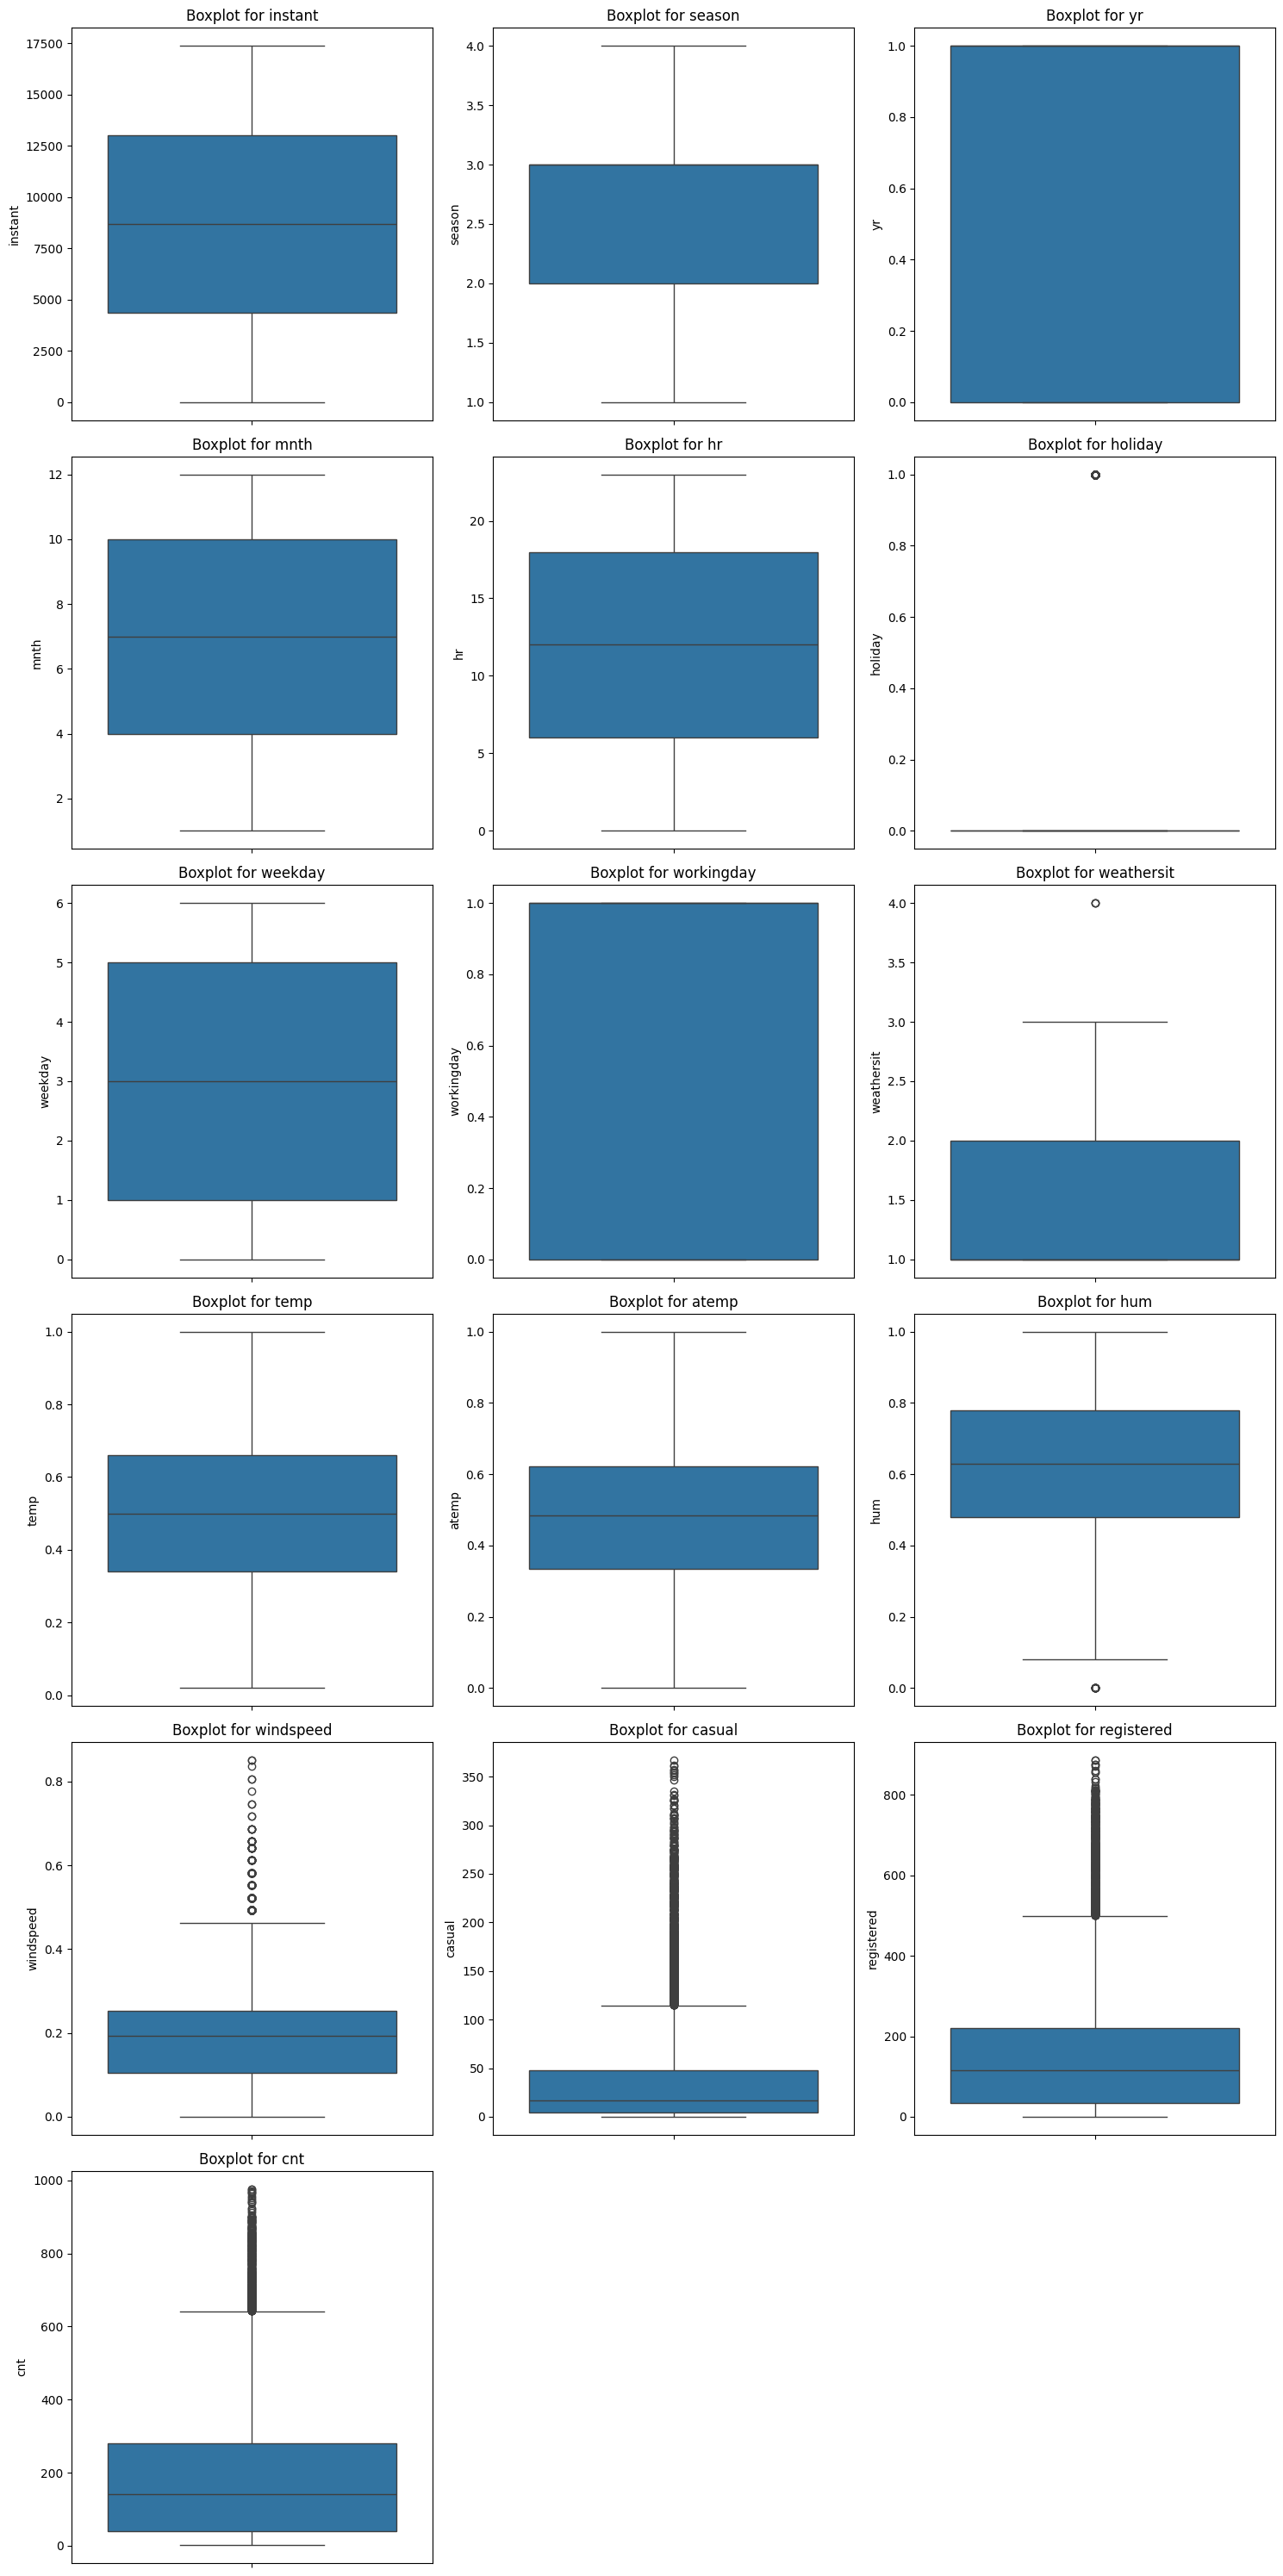

In [3]:
#Missing Value
print(data_day.isnull().sum())
print(data_hour.isnull().sum())

#Duplicated
print("\nJumlah data duplikat di Day:", data_day.duplicated().sum())
print("Jumlah data duplikat di Hour:", data_hour.duplicated().sum())

# Visualisasi outlier dengan boxplot untuk semua kolom numerik pada day.csv
numerical_columns = data_day.select_dtypes(include=['float64', 'int64']).columns

num_cols = 3
num_rows = -(-len(numerical_columns) // num_cols)

plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=data_day, y=column)
    plt.title(f"Boxplot for {column}")
    plt.tight_layout()

plt.show()

# Visualisasi outlier dengan boxplot untuk semua kolom numerik pada hour.csv
numerical_columns_hour = data_hour.select_dtypes(include=['float64', 'int64']).columns

num_cols_hour = 3
num_rows_hour = -(-len(numerical_columns_hour) // num_cols_hour)

plt.figure(figsize=(15, 5 * num_rows_hour))
for i, column in enumerate(numerical_columns_hour, 1):
    plt.subplot(num_rows_hour, num_cols_hour, i)
    sns.boxplot(data=data_hour, y=column)
    plt.title(f"Boxplot for {column}")
    plt.tight_layout()

plt.show()



**Insight:**
- Melakukan gathering dan assesing data yang melihat apakah data tersebut siap atau tidak untuk digunakan
- Melakukan pengecekan secara seksama melihat dari missing value, duplicate data, dan outliers yang nantinya akan dilakukan Data Cleaning

### Cleaning Data

In [4]:
# Fungsi untuk menghapus outlier menggunakan metode IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR  # Batas bawah
    upper_bound = Q3 + 1.5 * IQR  # Batas atas
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Dataset untuk day.csv
cleaned_data_day = data_day.copy()  # Salin dataset asli
for column in numerical_columns:
    cleaned_data_day = remove_outliers_iqr(cleaned_data_day, column)

print(f"Jumlah data setelah menghapus outlier (day.csv): {cleaned_data_day.shape[0]} dari {data_day.shape[0]} baris asli.")

# Dataset untuk hour.csv
cleaned_data_hour = data_hour.copy()  # Salin dataset asli
for column in numerical_columns_hour:
    cleaned_data_hour = remove_outliers_iqr(cleaned_data_hour, column)

print(f"Jumlah data setelah menghapus outlier (hour.csv): {cleaned_data_hour.shape[0]} dari {data_hour.shape[0]} baris asli.")


Jumlah data setelah menghapus outlier (day.csv): 655 dari 731 baris asli.
Jumlah data setelah menghapus outlier (hour.csv): 14534 dari 17379 baris asli.


**Insight:**
- Setelah melihat Assesing Data, terdapat outlier yang harus dihapus agar tidak memengaruhi analisis kita.
- Dilakukan penghapusan outlier untuk masing-masing data khususnya yang bersifat numerik agar tidak terjadi ketimpangan pada data tersebut.

## Exploratory Data Analysis (EDA)

### Explore ...


Statistik Deskriptif Data Per Hari


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,655.000000,655.000000,655.000000,655.000000,655.0,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.00000,655.000000,655.000000
mean,357.366412,2.506870,0.474809,6.545038,0.0,2.993893,0.748092,1.407634,0.491363,0.470946,0.633358,0.186224,737.60000,3660.157252,4397.757252
std,211.948901,1.118184,0.499747,3.482684,0.0,1.929164,0.434441,0.550454,0.185020,0.164436,0.140990,0.072228,522.93126,1570.067857,1854.957213
min,1.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.059130,0.079070,0.275833,0.022392,2.00000,20.000000,22.000000
25%,174.500000,1.500000,0.000000,3.500000,0.0,1.000000,0.000000,1.000000,0.330833,0.329850,0.524900,0.133721,303.50000,2506.500000,3129.000000
50%,348.000000,3.000000,0.000000,7.000000,0.0,3.000000,1.000000,1.000000,0.485833,0.474117,0.630833,0.176625,684.00000,3643.000000,4456.000000
75%,544.500000,3.000000,1.000000,10.000000,0.0,5.000000,1.000000,2.000000,0.653750,0.607960,0.734583,0.230723,1028.00000,4737.000000,5651.000000
max,731.000000,4.000000,1.000000,12.000000,0.0,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.378108,2258.00000,6946.000000,8173.000000



Statistik Deskriptif Data Per Jam


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14534.000000,14534.000000,14534.000000,14534.000000,14534.000000,14534.0,14534.000000,14534.000000,14534.000000,14534.000000,14534.000000,14534.000000,14534.000000,14534.000000,14534.000000,14534.000000
mean,8411.118274,2.485620,0.473442,6.503991,11.093987,0.0,3.025320,0.730081,1.447571,0.480886,0.462204,0.646501,0.179655,23.193409,118.755883,141.949291
std,5028.054496,1.122709,0.499311,3.508679,7.170394,0.0,1.962749,0.443933,0.649648,0.190324,0.170164,0.188437,0.111894,26.106143,104.852767,122.131159
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4070.250000,1.000000,0.000000,3.000000,5.000000,0.0,1.000000,0.000000,1.000000,0.320000,0.318200,0.500000,0.104500,3.000000,27.000000,32.000000
50%,8229.500000,2.000000,0.000000,7.000000,11.000000,0.0,3.000000,1.000000,1.000000,0.480000,0.469700,0.650000,0.164200,12.000000,98.000000,117.000000
75%,12716.750000,3.000000,1.000000,10.000000,18.000000,0.0,5.000000,1.000000,2.000000,0.640000,0.606100,0.810000,0.253700,36.000000,179.000000,223.000000
max,17379.000000,4.000000,1.000000,12.000000,23.000000,0.0,6.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.462700,114.000000,455.000000,512.000000


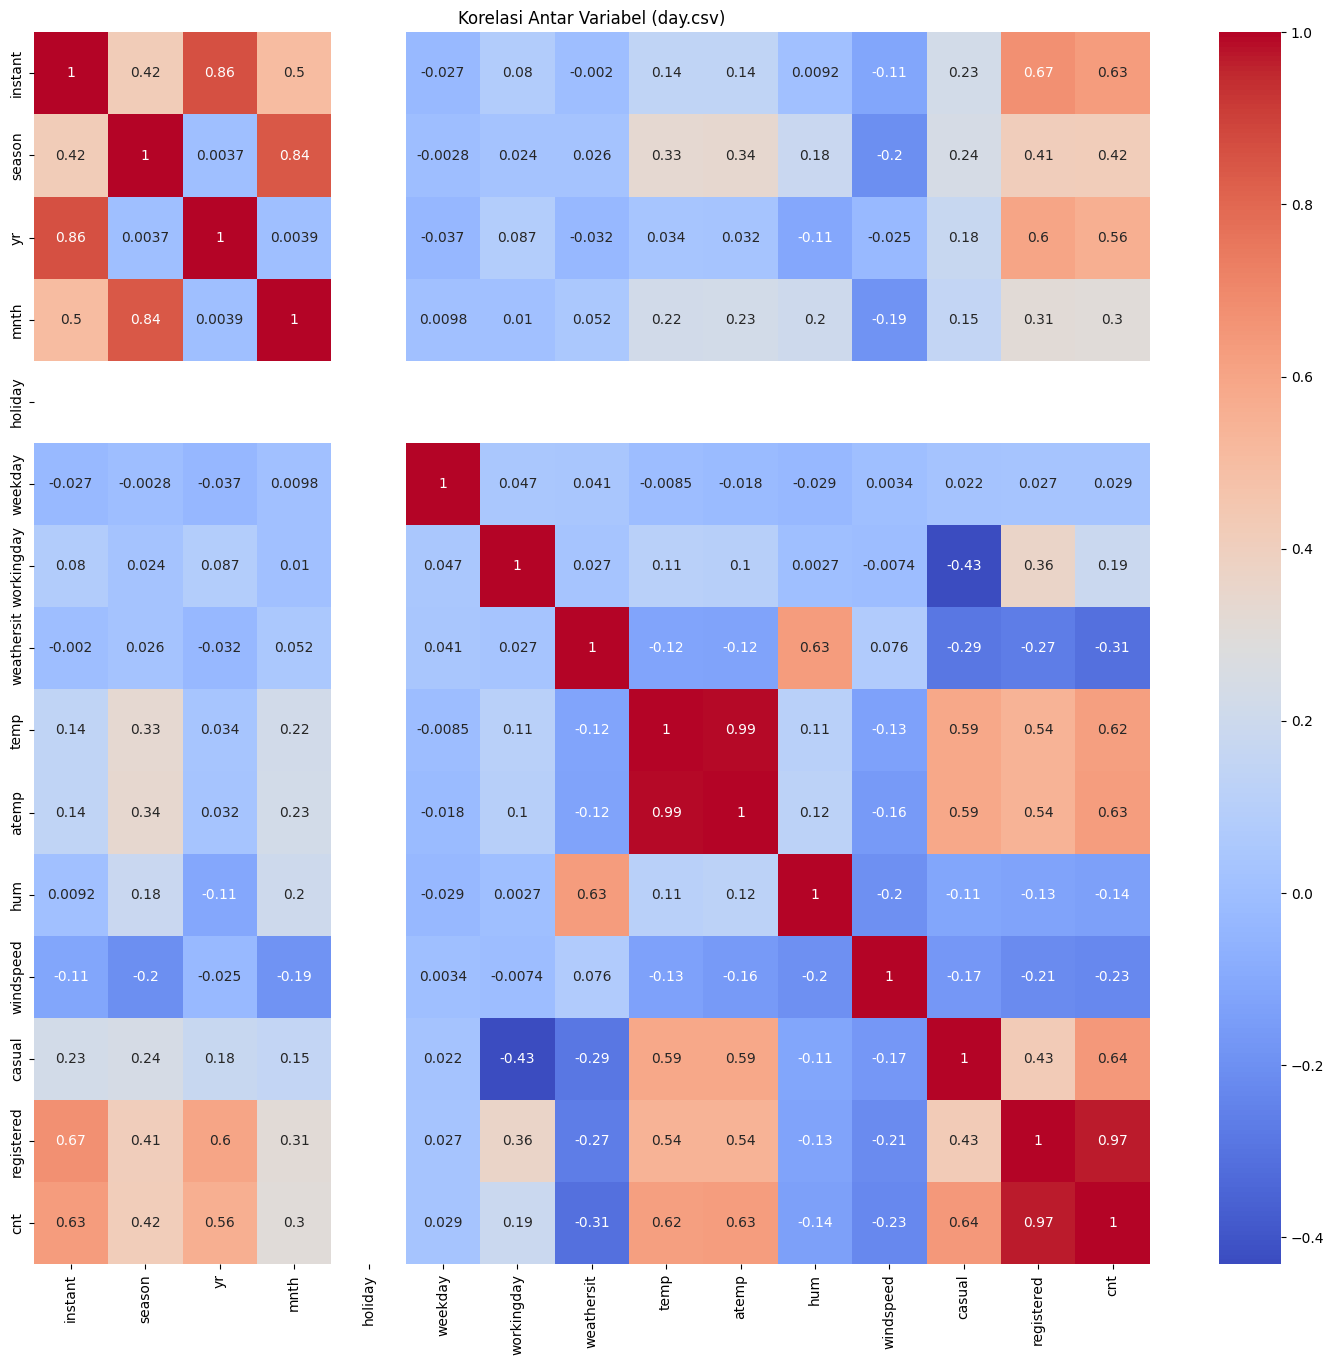

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

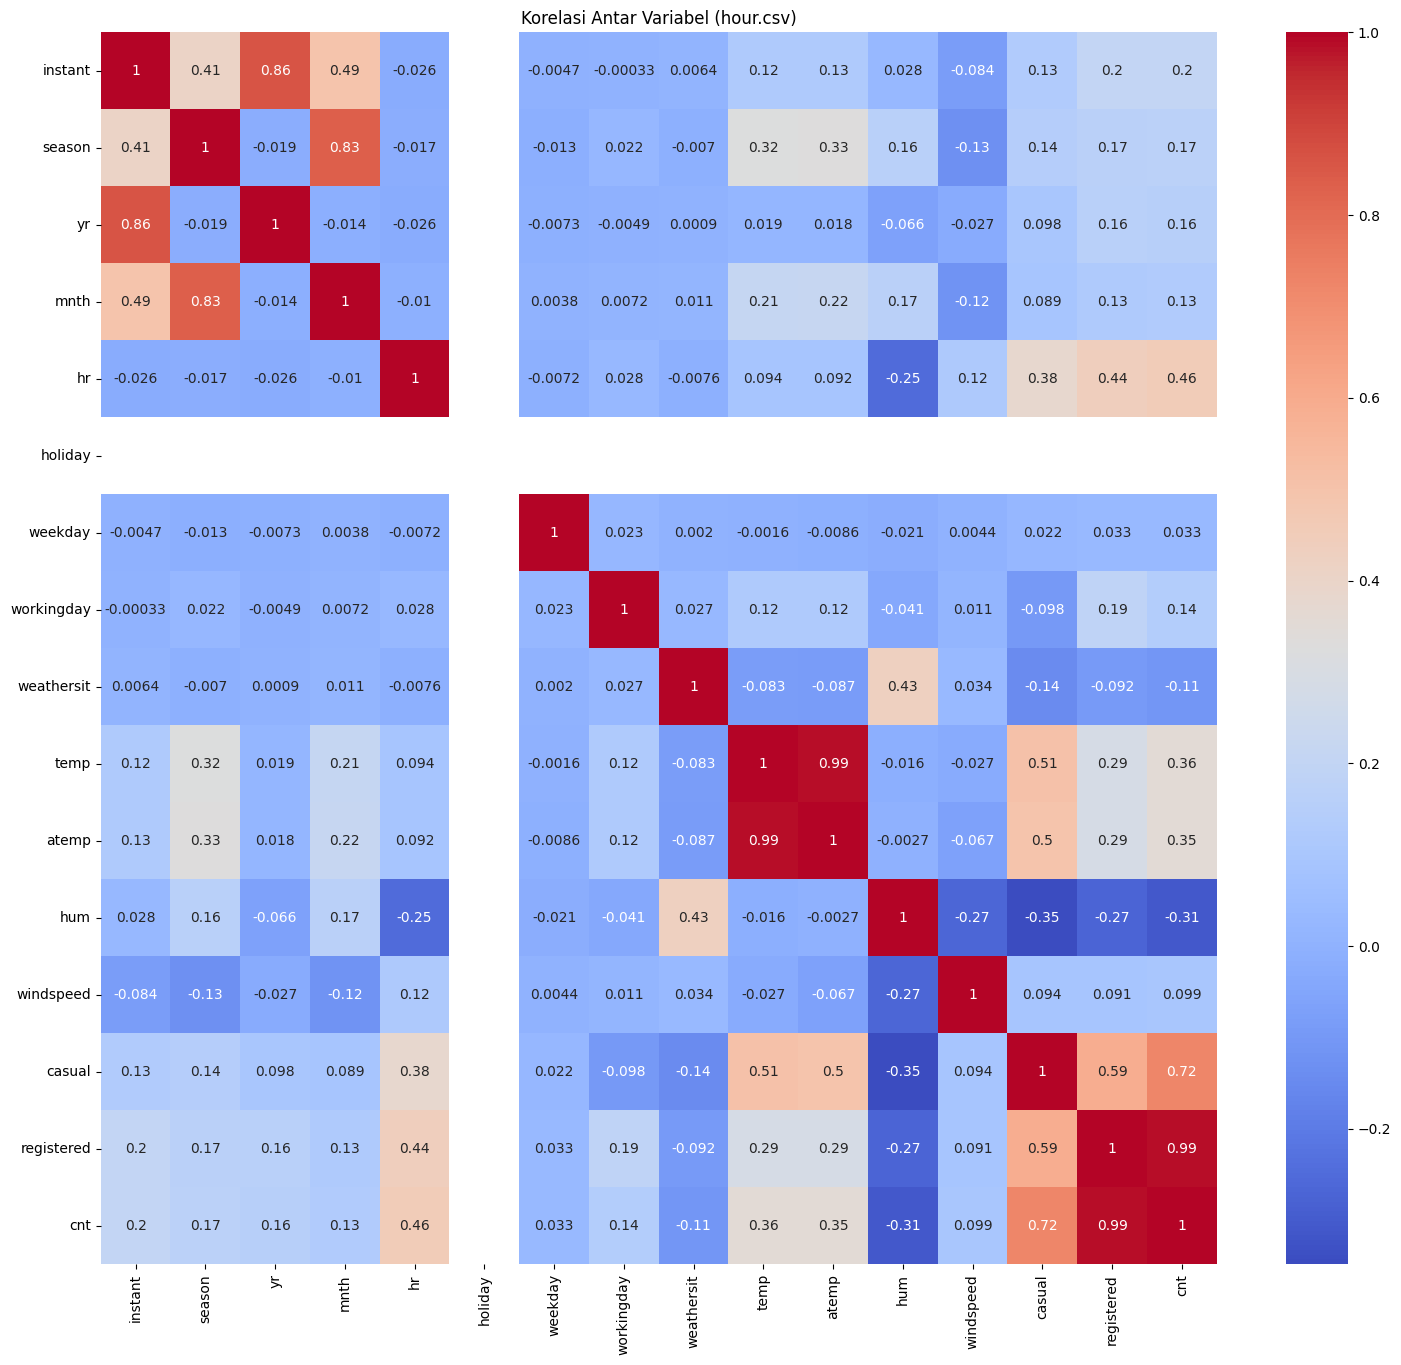

In [5]:
#Melihat Statistik Deskriptif pada masing-masing Dataset
print("\nStatistik Deskriptif Data Per Hari")
display(cleaned_data_day.describe())

print("\nStatistik Deskriptif Data Per Jam")
display(cleaned_data_hour.describe())

#Korelasi
correlation_matrix_day = cleaned_data_day.select_dtypes(include=['number']).corr()
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix_day, annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel (day.csv)')
plt.show()

correlation_matrix_hour = cleaned_data_hour.select_dtypes(include=['number']).corr()
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix_hour, annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel (hour.csv)')
plt

**Insight:**
- Melakukan coding untuk melihat statistik deskriptif untuk hal-hal umum dari dataset yang kita punya
- Melihat hasil korelasi antar data yang berhubungan kuat antara satu dengan yang lain

## Visualization & Explanatory Analysis

### Pertanyaan 1:

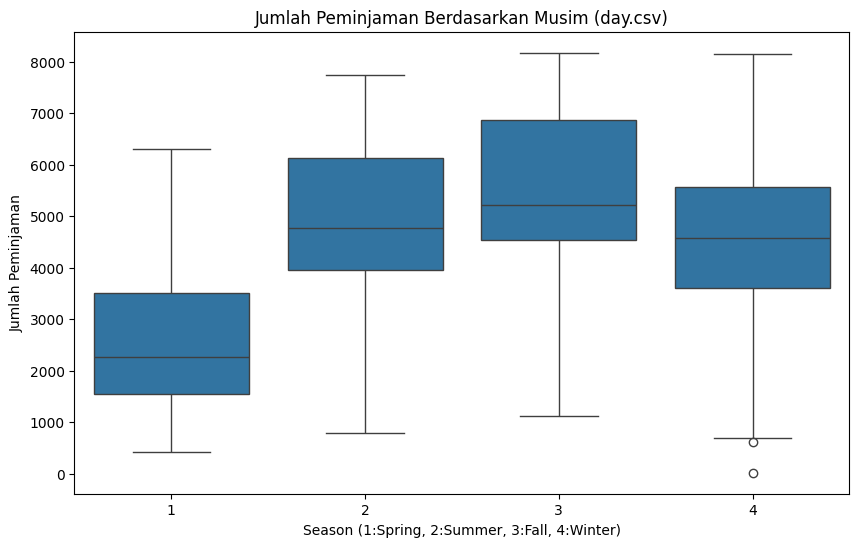

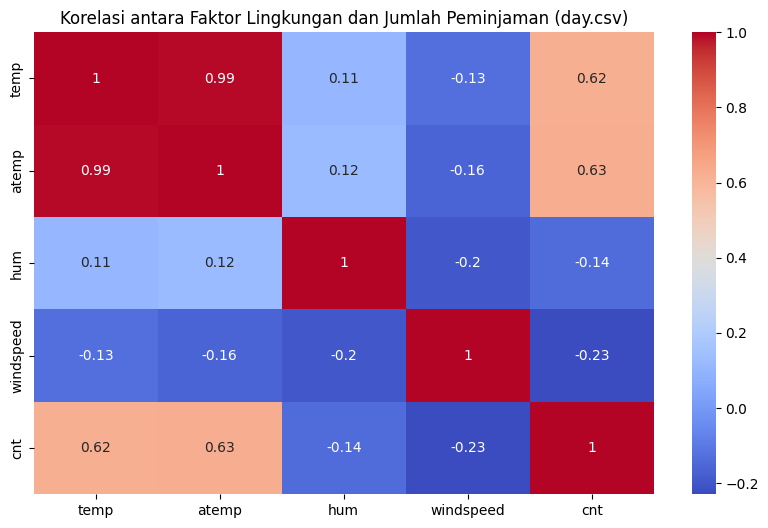

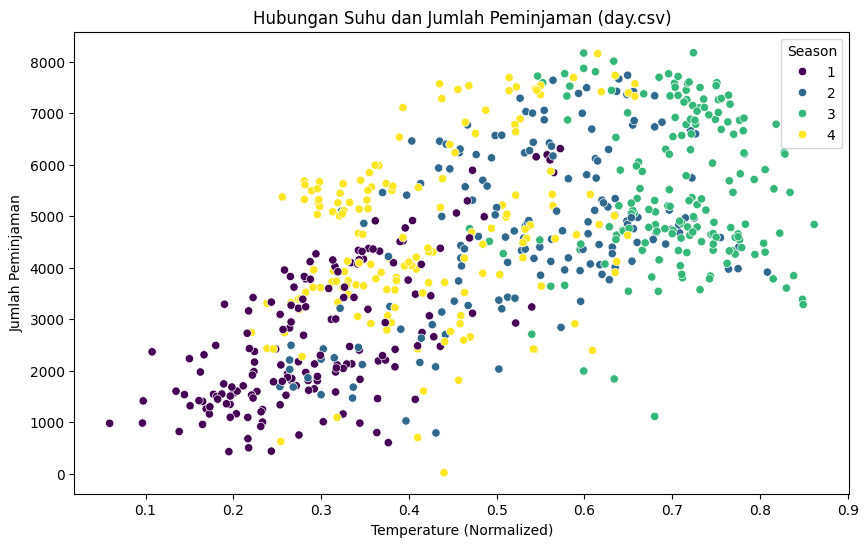

In [6]:
#Pengaruh Faktor Lingkungan dan Musiman terhadap Jumlah Peminjaman

# 1.1 Visualisasi distribusi jumlah peminjaman berdasarkan musim
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_data_day, x='season', y='cnt')
plt.title('Jumlah Peminjaman Berdasarkan Musim (day.csv)')
plt.xlabel('Season (1:Spring, 2:Summer, 3:Fall, 4:Winter)')
plt.ylabel('Jumlah Peminjaman')
plt.show()

# 1.2 Korelasi antara faktor lingkungan dan jumlah peminjaman
environmental_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
plt.figure(figsize=(10, 6))
sns.heatmap(cleaned_data_day[environmental_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antara Faktor Lingkungan dan Jumlah Peminjaman (day.csv)')
plt.show()

# 1.3 Visualisasi hubungan antara suhu dan jumlah peminjaman
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_data_day, x='temp', y='cnt', hue='season', palette='viridis')
plt.title('Hubungan Suhu dan Jumlah Peminjaman (day.csv)')
plt.xlabel('Temperature (Normalized)')
plt.ylabel('Jumlah Peminjaman')
plt.legend(title='Season')
plt.show()

### Pertanyaan 2:

Rata-rata penggunaan sepeda berdasarkan hari kerja atau libur:


,casual,registered,cnt
workingday,,,
0,1125.909091,2674.145455,3800.054545
1,606.842857,3992.181633,4599.024490


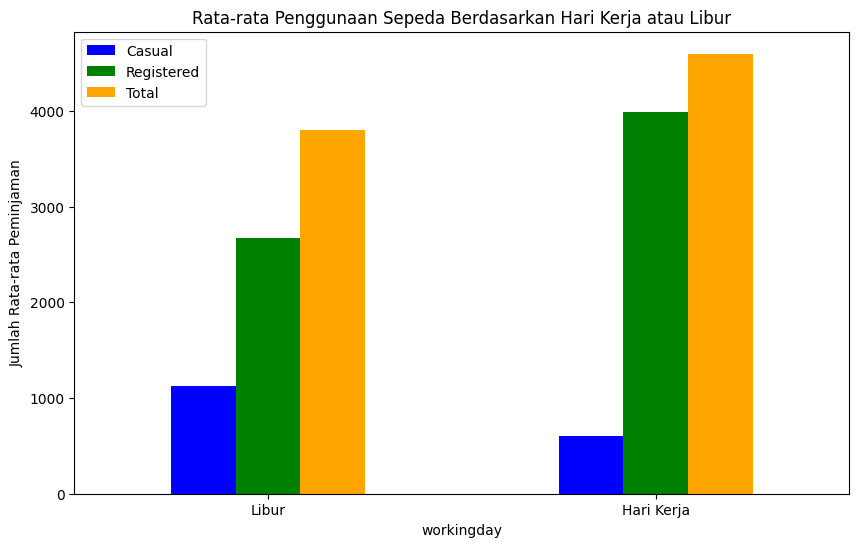

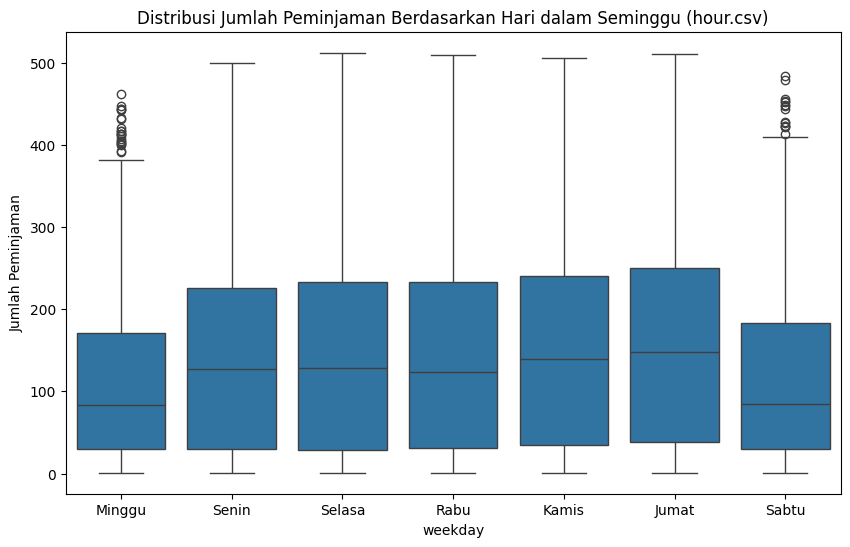

<Figure size 1000x600 with 0 Axes>

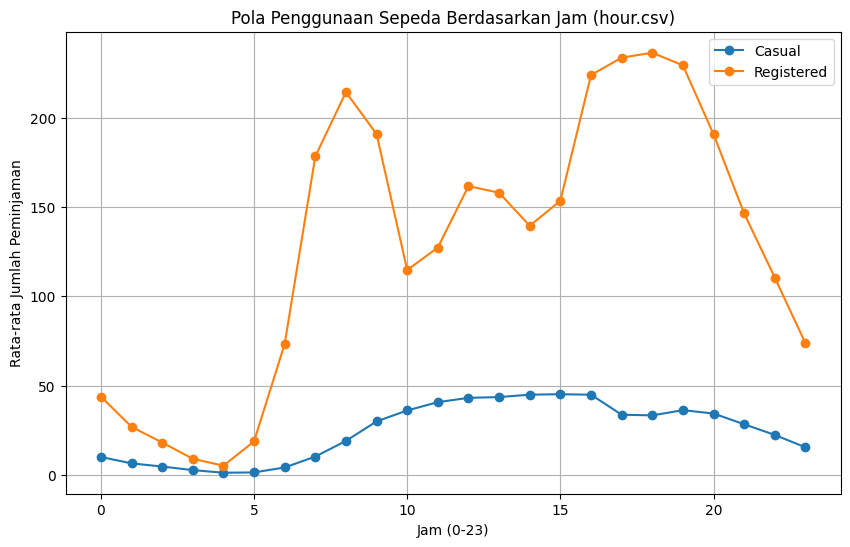

In [7]:
# Pertanyaan 2: Pola Penggunaan Sepeda oleh Pengguna Kasual dan Terdaftar

# 2.1 Rata-rata penggunaan sepeda berdasarkan hari kerja atau libur
usage_by_workingday = cleaned_data_day.groupby('workingday')[['casual', 'registered', 'cnt']].mean()
print("Rata-rata penggunaan sepeda berdasarkan hari kerja atau libur:")
display(usage_by_workingday)

usage_by_workingday.plot(kind='bar', figsize=(10, 6), color=['blue', 'green', 'orange'])
plt.title('Rata-rata Penggunaan Sepeda Berdasarkan Hari Kerja atau Libur')
plt.ylabel('Jumlah Rata-rata Peminjaman')
plt.legend(['Casual', 'Registered', 'Total'])
plt.xticks([0, 1], ['Libur', 'Hari Kerja'])
plt.xticks(rotation=0)
plt.show()

# 2.2 Distribusi jumlah peminjaman berdasarkan hari dalam seminggu
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_data_hour, x='weekday', y='cnt', hue=None)
plt.title('Distribusi Jumlah Peminjaman Berdasarkan Hari dalam Seminggu (hour.csv)')
plt.xticks([0, 1, 2, 3, 4, 5,6], ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'])
plt.ylabel('Jumlah Peminjaman')
plt.show()

# 2.3 Pola penggunaan sepeda oleh pengguna kasual dan terdaftar di setiap jam
hourly_usage = cleaned_data_hour.groupby('hr')[['casual', 'registered']].mean()

plt.figure(figsize=(10, 6))
hourly_usage.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Pola Penggunaan Sepeda Berdasarkan Jam (hour.csv)')
plt.xlabel('Jam (0-23)')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.legend(['Casual', 'Registered'])
plt.grid()
plt.show()

**Insight:**
- Melihat dari plot-plot yang telah diinisialisasi bahwa kita dapat melihat hubungan-hubungan antardata atau antarkolom yang dapat membantu kita menjawab pertanyaan bisnis kita.
- Jawaban harus disesuaikan dengan fakta dari hasil analisis data yang telah dilakukan

## Analisis Lanjutan (Opsional)

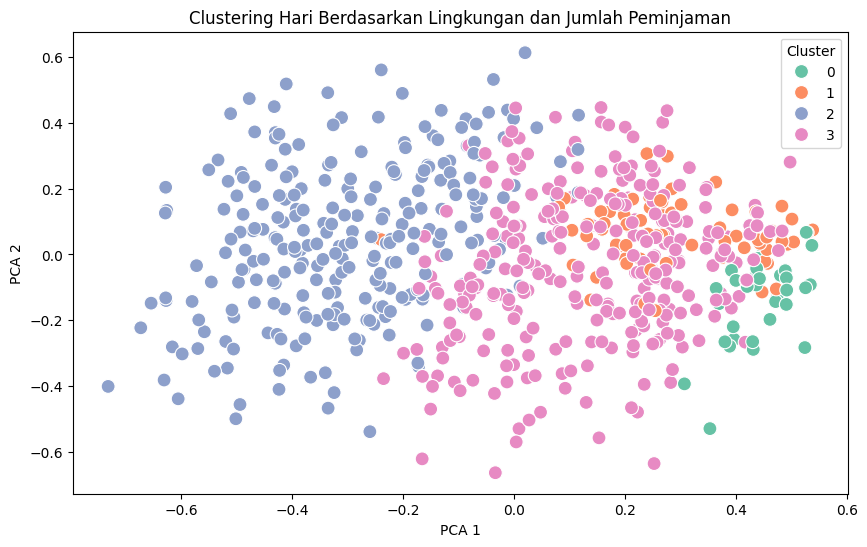

<ipython-input-9-ea1e041d448a>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_data_day, x='Cluster', y='cnt', palette='Set2')


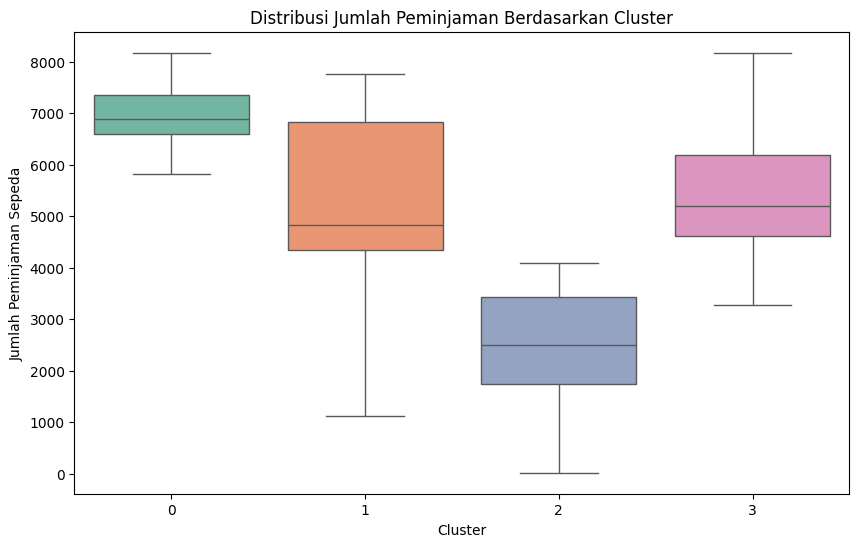

,dteday,Cluster
0,1/1/2011,2
1,1/2/2011,2
2,1/3/2011,2
3,1/4/2011,2
4,1/5/2011,2


,count
Cluster,
0,33
1,71
2,256
3,295


In [9]:
# Pilih Fitur yang Relevan untuk Clustering
features = cleaned_data_day[['temp', 'hum', 'windspeed', 'cnt']]

# Normalisasi Fitur
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Convert features_scaled back to DataFrame
features_scaled = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Rule-Based Clustering
# Contoh aturan clustering berdasarkan nilai suhu, kelembapan, dan jumlah peminjaman
def assign_cluster(row):
    if row['temp'] >= 0.75 and row['hum'] <= 0.5 and row['cnt'] >= 0.7:
        return 0  # Cluster 0: Suhu tinggi, kelembapan rendah, peminjaman tinggi
    elif row['temp'] >= 0.75 and row['hum'] > 0.5:
        return 1  # Cluster 1: Suhu tinggi, kelembapan tinggi
    elif row['temp'] < 0.75 and row['cnt'] < 0.5:
        return 2  # Cluster 2: Suhu rendah, peminjaman rendah
    else:
        return 3  # Cluster 3: Kategori lainnya

# Menambahkan Cluster ke Dataset
cleaned_data_day['Cluster'] = features_scaled.apply(lambda row: assign_cluster(row), axis=1)

# Visualisasi Clustering menggunakan PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=cleaned_data_day['Cluster'], palette='Set2', s=100)
plt.title('Clustering Hari Berdasarkan Lingkungan dan Jumlah Peminjaman')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# Visualisasi Distribusi 'cnt' dalam Setiap Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_data_day, x='Cluster', y='cnt', palette='Set2')
plt.title('Distribusi Jumlah Peminjaman Berdasarkan Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()

# Menampilkan Hasil Cluster pada Dataset
display(cleaned_data_day[['dteday', 'Cluster']].head())
display(cleaned_data_day['Cluster'].value_counts().sort_index(ascending=True))

## Conclusion

# Pertanyaan:
1. Bagaimana pengaruh faktor lingkungan dan musiman (seperti suhu, kelembapan, kecepatan angin, dan musim) terhadap jumlah peminjaman sepeda setiap hari?

2. Apa pola penggunaan sepeda oleh pengguna kasual dan terdaftar di hari kerja dibandingkan akhir pekan, serta peran libur nasional dalam memengaruhi jumlah peminjaman?

# Jawaban:
1. Faktor lingkungan dan musim ternyata memiliki pengaruh dalam peminjaman sepeda setiap harinya. Hal ini bisa kita lihat bahwa count (hitungan) peminjaman sepeda memiliki kolerasi yang tergolong tinggi dengan suhu/temperatur dan musim gugur memiliki tingkat distribusi peminjaman tertinggi di antara 3 musim lainnya. Selain itu, dapat dilihat grafik hubungan suhu dan peminjaman sepeda bahwa semakin tinggi suhu lingkungannya, maka semakin tinggi tingkat peminjaman sepedanya
2. Hasil plot dan analisis menunjukkan bahwa penggunaan sepeda secara kasual dan terdaftar pada hari kerja lebih tinggi dibandingkan dengan pada akhir pekan dan libur dengan perbedaan secara rata rata 800 sepeda secara keseluruhannya. Tidak hanya itu, untuk hari peminjaman terbanyak ada pada hari Jumat dengan distribusi peminjaman tertinggi dibandingkan hari lainnya.